Data Breach Cleaning Exercise - Exploratory Data Analysis

In [21]:
# Loading the necessary libraries needed for data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')


In [22]:
# Loading the file using file upload option

from google.colab import files
 
 
uploaded = files.upload()


Saving DataBreaches.csv to DataBreaches (1).csv


In [23]:
# Loading the file with most recent record

import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['DataBreaches.csv']),encoding='windows-1252')
print(df)

                          Entity  \
0                            AOL   
1    Cardsystems Solutions Inc.    
2                Ameritrade Inc.   
3                      Citigroup   
4      Automatic Data Processing   
..                           ...   
271                       Orbitz   
272                      Aadhaar   
273       Saks and Lord & Taylor   
274                  Panerabread   
275                 MyFitnessPal   

                                      Alternative Name  \
0                                      American Online   
1    Third-party payment processor for Visa, Master...   
2    Computer backup tape containing personal infor...   
3                                                  NaN   
4             Business outsourcing, payrolls, benefits   
..                                                 ...   
271                                                NaN   
272            India's national government ID database   
273                 Both owned by Hudson's Ba

In [24]:
#view the data
df.head()

,Entity,Alternative Name,Story,Year,records lost,Organisation,Method of Leak,Number of Records Stolen,Data Sensitivity,1st source link,2nd source link,3rd source,Source Name
0,AOL,American Online,A former America Online software engineer stol...,2004,92000000.0,web,inside job,92000000,1,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,NaN,CNN
1,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,2005,40000000.0,financial,hacked,40000000,300,http://www.msnbc.msn.com/id/8260050/ns/technol...,NaN,NaN,MSNBC
2,Ameritrade Inc.,Computer backup tape containing personal infor...,online broker,2005,200000.0,financial,lost / stolen device or media,200000,20,http://www.nbcnews.com/id/7561268/,NaN,NaN,NBC
3,Citigroup,NaN,Blame the messenger! A box of computer tapes c...,2005,3900000.0,financial,lost / stolen device or media,3900000,300,http://www.nytimes.com/2005/06/07/business/07d...,NaN,NaN,NY Times
4,Automatic Data Processing,"Business outsourcing, payrolls, benefits",NaN,2005,125000.0,financial,poor security,130000,20,http://abcnews.go.com/Technology/story?id=2160...,NaN,NaN,ABC


In [25]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    276 non-null    object 
 1   Alternative Name          127 non-null    object 
 2   Story                     240 non-null    object 
 3   Year                      276 non-null    int64  
 4   records lost              274 non-null    float64
 5   Organisation              276 non-null    object 
 6   Method of Leak            276 non-null    object 
 7   Number of Records Stolen  276 non-null    int64  
 8   Data Sensitivity          276 non-null    int64  
 9   1st source link           276 non-null    object 
 10  2nd source link           54 non-null     object 
 11  3rd source                4 non-null      object 
 12  Source Name               275 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 28.2+ KB


,Year,records lost,Number of Records Stolen,Data Sensitivity
count,276.000000,2.740000e+02,2.760000e+02,276.000000
mean,2012.449275,3.698600e+07,3.452534e+07,5357.891304
std,3.308551,1.481060e+08,1.300505e+08,14489.717269
min,2004.000000,1.025000e+03,1.025000e+03,1.000000
25%,2010.000000,3.935000e+05,4.000000e+05,1.000000
50%,2013.000000,2.150000e+06,2.000000e+06,20.000000
75%,2015.000000,1.140000e+07,1.242500e+07,300.000000
max,2018.000000,1.370000e+09,1.100000e+09,50000.000000


In [26]:
#Find the duplicates

df.duplicated().sum()

0

In [27]:
#unique values

df['Year'].unique()



array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [28]:
df['Method of Leak'].unique()

array(['inside job', 'hacked', 'lost / stolen device or media',
       'poor security', 'accidentally published', 'hacked '], dtype=object)

In [29]:
df['Data Sensitivity'].unique()

array([    1,   300,    20, 50000,  4000,     3])

In [30]:
#Make a copy:

df_final = df.copy()

print(df_final)

                          Entity  \
0                            AOL   
1    Cardsystems Solutions Inc.    
2                Ameritrade Inc.   
3                      Citigroup   
4      Automatic Data Processing   
..                           ...   
271                       Orbitz   
272                      Aadhaar   
273       Saks and Lord & Taylor   
274                  Panerabread   
275                 MyFitnessPal   

                                      Alternative Name  \
0                                      American Online   
1    Third-party payment processor for Visa, Master...   
2    Computer backup tape containing personal infor...   
3                                                  NaN   
4             Business outsourcing, payrolls, benefits   
..                                                 ...   
271                                                NaN   
272            India's national government ID database   
273                 Both owned by Hudson's Ba

In [31]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    276 non-null    object 
 1   Alternative Name          127 non-null    object 
 2   Story                     240 non-null    object 
 3   Year                      276 non-null    int64  
 4   records lost              274 non-null    float64
 5   Organisation              276 non-null    object 
 6   Method of Leak            276 non-null    object 
 7   Number of Records Stolen  276 non-null    int64  
 8   Data Sensitivity          276 non-null    int64  
 9   1st source link           276 non-null    object 
 10  2nd source link           54 non-null     object 
 11  3rd source                4 non-null      object 
 12  Source Name               275 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 28.2+ KB


In [32]:
# Removing double quotes from the string text fields
df_final['Entity'] = df_final['Entity'].apply(lambda x: x.replace('"', ''))


In [33]:
df_final["Alternative Name"] = df["Alternative Name"].astype(str)

df_final['Alternative Name'] = df_final['Alternative Name'].apply(lambda x: x.replace('"', ''))


In [34]:
df_final["Story"] = df["Story"].astype(str)

df_final['Story'] = df_final['Story'].apply(lambda x: x.replace('"', ''))


In [35]:
#Find null values

df.isnull().sum()

Entity                        0
Alternative Name            149
Story                        36
Year                          0
records lost                  2
Organisation                  0
Method of Leak                0
Number of Records Stolen      0
Data Sensitivity              0
1st source link               0
2nd source link             222
3rd source                  272
Source Name                   1
dtype: int64

In [36]:
#Replace null values
import numpy as np
df_final.replace(np.nan,'0',inplace = True)

#Check the changes now
df_final.isnull().sum()

Entity                      0
Alternative Name            0
Story                       0
Year                        0
records lost                0
Organisation                0
Method of Leak              0
Number of Records Stolen    0
Data Sensitivity            0
1st source link             0
2nd source link             0
3rd source                  0
Source Name                 0
dtype: int64

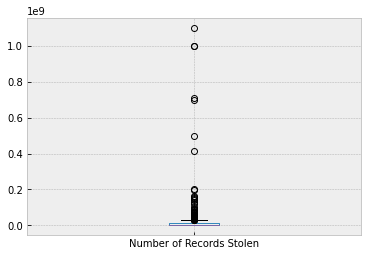

In [37]:
#Boxplot

df_final[['Number of Records Stolen']].boxplot()

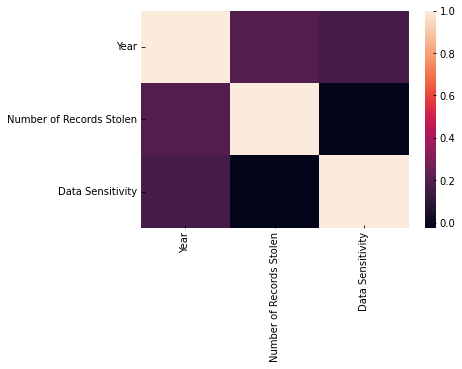

In [38]:
#Correlation plot

sns.heatmap(df_final.corr())

In [39]:
#Converting Data Sensitivity Numeric column into Text details

df_final['Data Sensitivity'] = df_final['Data Sensitivity'].map({1: "Email address/Online Info", 20: "SSN/Personal details", 300: "Credit Card Info", 4000: "Email password/Health records", 50000: "Full bank account details"})

In [40]:
df_final.head()

,Entity,Alternative Name,Story,Year,records lost,Organisation,Method of Leak,Number of Records Stolen,Data Sensitivity,1st source link,2nd source link,3rd source,Source Name
0,AOL,American Online,A former America Online software engineer stol...,2004,92000000.0,web,inside job,92000000,Email address/Online Info,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,0,CNN
1,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,2005,40000000.0,financial,hacked,40000000,Credit Card Info,http://www.msnbc.msn.com/id/8260050/ns/technol...,0,0,MSNBC
2,Ameritrade Inc.,Computer backup tape containing personal infor...,online broker,2005,200000.0,financial,lost / stolen device or media,200000,SSN/Personal details,http://www.nbcnews.com/id/7561268/,0,0,NBC
3,Citigroup,nan,Blame the messenger! A box of computer tapes c...,2005,3900000.0,financial,lost / stolen device or media,3900000,Credit Card Info,http://www.nytimes.com/2005/06/07/business/07d...,0,0,NY Times
4,Automatic Data Processing,"Business outsourcing, payrolls, benefits",nan,2005,125000.0,financial,poor security,130000,SSN/Personal details,http://abcnews.go.com/Technology/story?id=2160...,0,0,ABC


In [41]:
df_final = df_final.replace(np.nan, '', regex=True)


In [42]:
df_final = df_final.fillna('')

In [43]:
df_final.head()

,Entity,Alternative Name,Story,Year,records lost,Organisation,Method of Leak,Number of Records Stolen,Data Sensitivity,1st source link,2nd source link,3rd source,Source Name
0,AOL,American Online,A former America Online software engineer stol...,2004,92000000.0,web,inside job,92000000,Email address/Online Info,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,0,CNN
1,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,2005,40000000.0,financial,hacked,40000000,Credit Card Info,http://www.msnbc.msn.com/id/8260050/ns/technol...,0,0,MSNBC
2,Ameritrade Inc.,Computer backup tape containing personal infor...,online broker,2005,200000.0,financial,lost / stolen device or media,200000,SSN/Personal details,http://www.nbcnews.com/id/7561268/,0,0,NBC
3,Citigroup,nan,Blame the messenger! A box of computer tapes c...,2005,3900000.0,financial,lost / stolen device or media,3900000,Credit Card Info,http://www.nytimes.com/2005/06/07/business/07d...,0,0,NY Times
4,Automatic Data Processing,"Business outsourcing, payrolls, benefits",nan,2005,125000.0,financial,poor security,130000,SSN/Personal details,http://abcnews.go.com/Technology/story?id=2160...,0,0,ABC


In [44]:
df_final.to_csv (r'export_dataframe.csv', index = False, header=True)